# PROBLEM SET 3: Implementing Logistic Regression to Breast Cancer Wisconsin (Diagnostic)

### SEAN XANDER B. AQUINO | BSCS 2A

In [107]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo

# Data preparation

In [108]:
dataset = fetch_ucirepo(id=17) 
X = dataset.data.features 
y = dataset.data.targets 

# Displaying basic information about the dataset


In [109]:
print("Dataset Shape:", X.shape)
print("\nFeature Names:\n", X.columns.tolist())
print("\nSample Data:")
print(X.head())
print("\nTarget Distribution:")
print(y['Diagnosis'].value_counts())

Dataset Shape: (569, 30)

Feature Names:
 ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

Sample Data:
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0 

In [110]:
texture_columns = [col for col in X.columns if 'texture' in col.lower()]
print("Texture-related columns found:", texture_columns)

Texture-related columns found: ['texture1', 'texture2', 'texture3']


In [ ]:
if 'texture_mean' in X.columns:
    texture_feature = 'texture_mean'
else:
    texture_feature = texture_columns[0]  

X = X[[texture_feature]]  

print("\nUnique values in y before conversion:", y['Diagnosis'].unique())
y = y['Diagnosis'].map({'B': 0, 'M': 1})  # Convert 'B' (benign) to 0, 'M' (malignant) to 1


Unique values in y before conversion: ['M' 'B']


# Train-Test splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (455, 1)
Testing set shape: (114, 1)


# Feature scaling

In [113]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Training the Logistic Regression model


In [115]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### Getting the prediction probabilities


In [116]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]

### Create a DataFrame for plotting


In [ ]:
example_df = X_test.copy()
example_df['Diagnosis'] = y_test.values
example_df['logistic_preds'] = y_probs

# Visualization of Logistic Regression Model Prediction

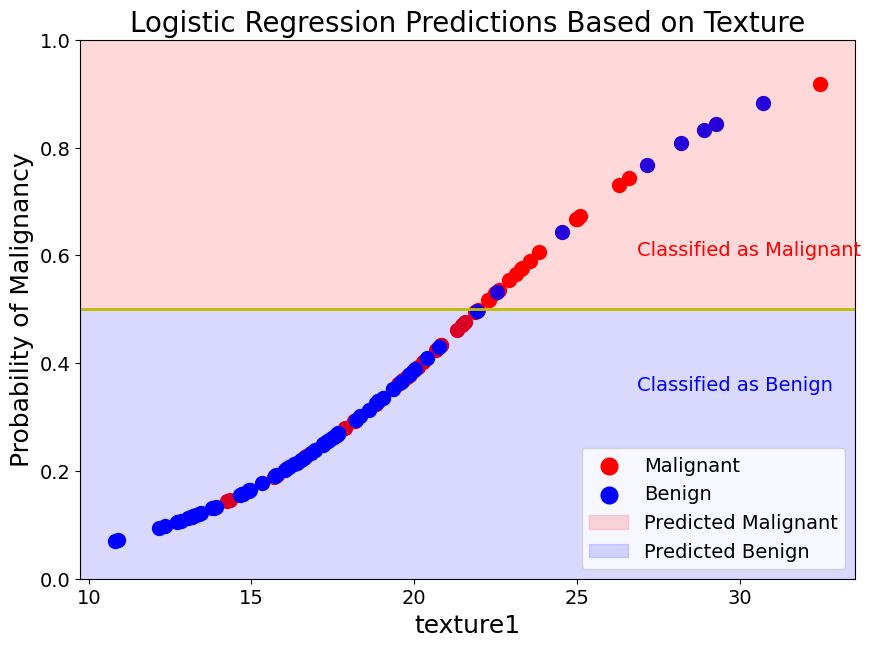

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

# Define filters for target classes
malignantFilter = example_df['Diagnosis'] == 1
benignFilter = example_df['Diagnosis'] == 0

# Scatter plot for each class
ax.scatter(example_df.loc[malignantFilter, 'texture1'].values,
          example_df.loc[malignantFilter, 'logistic_preds'].values,
          color='r',
          s=100,
          label='Malignant')

ax.scatter(example_df.loc[benignFilter, 'texture1'].values,
          example_df.loc[benignFilter, 'logistic_preds'].values,
          color='b',
          s=100,
          label='Benign')

ax.axhline(y=0.5, c='y', linewidth=2)

ax.axhspan(0.5, 1, alpha=0.15, color='red', label="Predicted Malignant")
ax.axhspan(0, 0.5, alpha=0.15, color='blue', label="Predicted Benign")

ax.text(ax.get_xlim()[1] * 0.8, 0.6, 'Classified as Malignant', fontsize=14, color='red')
ax.text(ax.get_xlim()[1] * 0.8, 0.35, 'Classified as Benign', fontsize=14, color='blue')

ax.set_ylim(0, 1)
ax.set_xlabel('texture1', fontsize=18)
ax.set_ylabel('Probability of Malignancy', fontsize=18)
ax.set_title('Logistic Regression Predictions Based on Texture', fontsize=20)
ax.legend(loc='lower right', markerscale=1.2, fontsize=14)
ax.tick_params(labelsize=14)

plt.show()

# Displaying the correlation matrix for encoded features

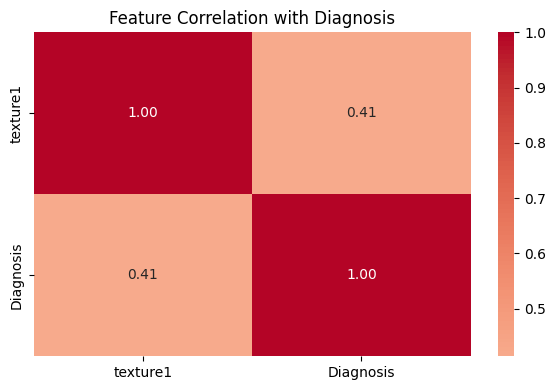

In [ ]:
correlation_df = X_train_scaled.copy()
correlation_df['Diagnosis'] = y_train.values  # Add the target column

corr_matrix = correlation_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

plt.title('Feature Correlation with Diagnosis')
plt.tight_layout()
plt.show()


## Summary of the preprocessed data

In [ ]:
print("\nPreprocessing Summary:")
print("-" * 50)
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Feature used: {X.columns[0]}")  # Display the selected feature
print("\nTarget distribution in training set:")
print(y_train.value_counts())  # Display distribution of target


Preprocessing Summary:
--------------------------------------------------
Total samples: 569
Training samples: 455
Testing samples: 114
Feature used: texture1

Target distribution in training set:
Diagnosis
0    285
1    170
Name: count, dtype: int64


## Displaying first few rows of processed data


In [124]:
print(X_train_scaled.head())

   texture1
0  0.891826
1 -1.639710
2  0.455515
3  0.726168
4  0.194195


# Getting the model's accuracy


In [134]:
score = model.score(X_test_scaled, y_test)
print("Model Accuracy:", score)

cm = metrics.confusion_matrix(y_test, model.predict(X_test_scaled))

print("\nClassification Report:")
print(metrics.classification_report(y_test, model.predict(X_test_scaled)))


Model Accuracy: 0.7105263157894737

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.80        72
           1       0.70      0.38      0.49        42

    accuracy                           0.71       114
   macro avg       0.70      0.64      0.64       114
weighted avg       0.71      0.71      0.69       114



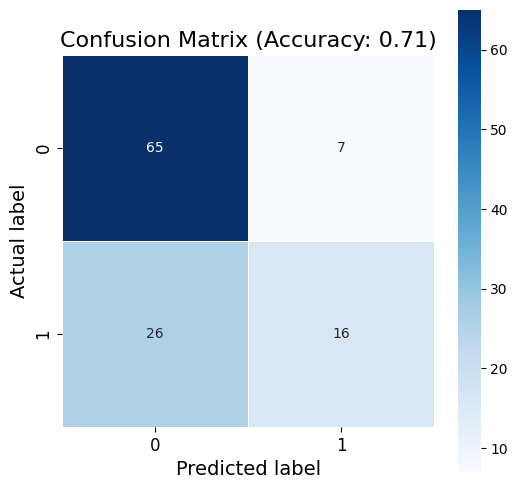

In [135]:
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')

plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.title(f'Confusion Matrix (Accuracy: {score:.2f})', fontsize=16)
plt.tick_params(labelsize=12)
plt.show()

# Training the model using regularizations [L1 (Lasso) and L2 (Ridge)]
#### to determine the effects of using regularization in training a model


In [ ]:
# Train models with L1 and L2 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
model_l1.fit(X_train_scaled, y_train)

model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42, max_iter=1000)
model_l2.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

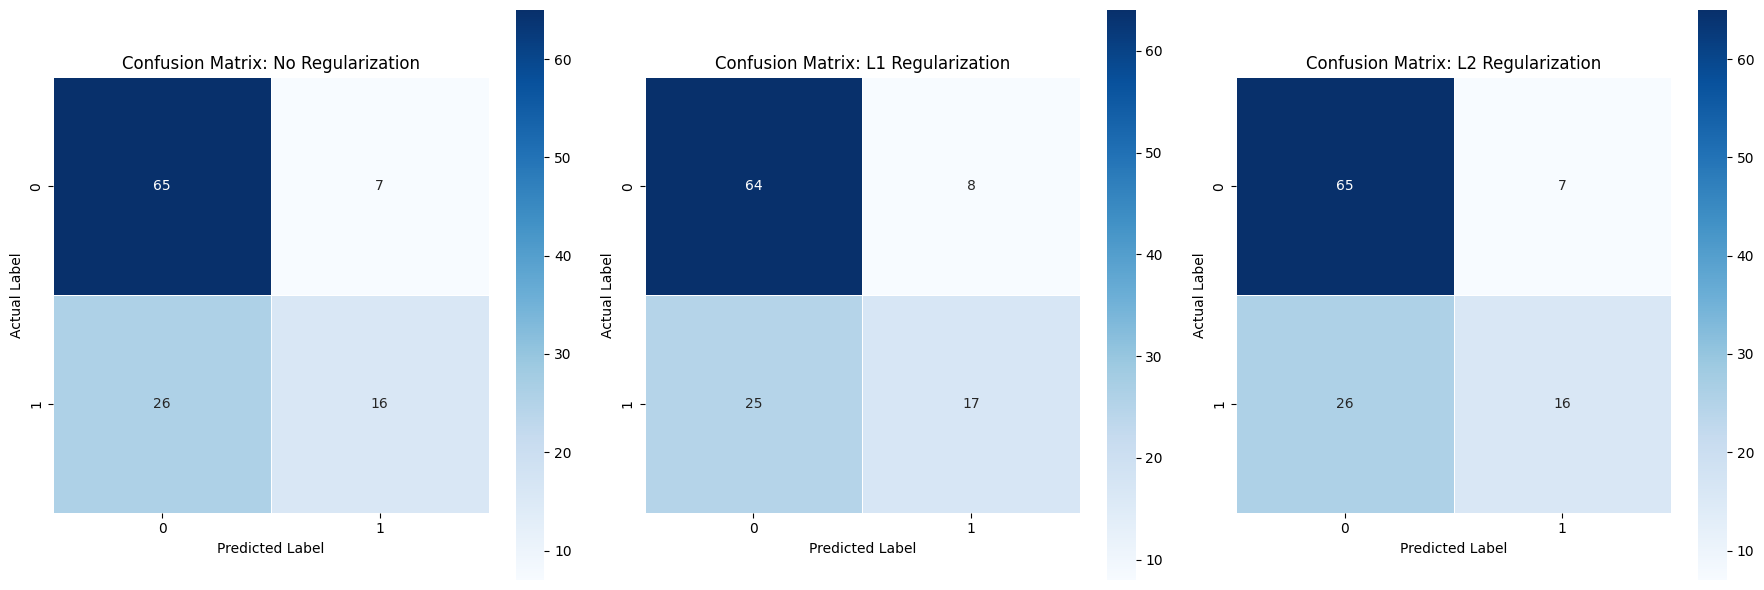

In [131]:
# Create confusion matrices for No Regularization, L1, and L2 models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models = {
    'No Regularization': model,
    'L1 Regularization': model_l1,
    'L2 Regularization': model_l2
}

for ax, (name, model) in zip(axes, models.items()):
    cm = metrics.confusion_matrix(y_test, model.predict(X_test_scaled))  # Ensure scaled input
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')

plt.tight_layout()
plt.show()


# Accuracy comparison of the models

In [132]:
score_original = model.score(X_test_scaled, y_test)
score_l1 = model_l1.score(X_test_scaled, y_test)
score_l2 = model_l2.score(X_test_scaled, y_test)

print("\nOriginal Model Accuracy:", score_original)
print("L1 Regularized Model Accuracy:", score_l1)
print("L2 Regularized Model Accuracy:", score_l2)


Original Model Accuracy: 0.7105263157894737
L1 Regularized Model Accuracy: 0.7105263157894737
L2 Regularized Model Accuracy: 0.7105263157894737
